In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import nltk
from wordcloud import WordCloud
import pickle
import math

In [2]:
# Loading the datasets from Excel files
a = pd.read_excel(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\A.xlsx')
b = pd.read_excel(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\B.xlsx')

In [3]:
# Converting `lastOnline` column to UTC timezone in dataset `a`
a['lastOnline'] = a['lastOnline'].dt.tz_localize('UTC')
# Converting `lastOnline` column to datetime format in dataset `b`
b['lastOnline'] = pd.to_datetime(b['lastOnline'])

# Dropping `gender` column from both datasets
a = a.drop(columns='gender')
b = b.drop(columns='gender')

# Rounding numerical columns to two decimal places
a.countDetails = a.countDetails.round(decimals=2)
a.distance = a.distance.round(decimals=2)
b.distance = b.distance.round(decimals=2)

# Extracting the first word of 'locationCity' column to standardize it
a['locationCity'] = a['locationCity'].astype(str).fillna('').apply(lambda x: x.split()[0])
b['locationCity'] = b['locationCity'].astype(str).fillna('').apply(lambda x: x.split()[0])

# Cleaning text data by removing whitespaces and newline characters
a['whazzup'] = a['whazzup'].str.replace(' ', '').str.replace('\n', '').str.replace('\r', '')
a['whazzup'] = a['whazzup'].apply(lambda x: x.split() if isinstance(x, str) else [])
a['whazzup'] = a['whazzup'].apply(lambda x: ' '.join(x))
b['whazzup'] = b['whazzup'].str.replace(' ', '').str.replace('\n', '').str.replace('\r', '')
b['whazzup'] = b['whazzup'].apply(lambda x: x.split() if isinstance(x, str) else [])
b['whazzup'] = b['whazzup'].apply(lambda x: ' '.join(x))

# Filling missing values in 'distance' column with 0
a['distance'] = a['distance'].fillna(0)
b['distance'] = b['distance'].fillna(0)

# Converting boolean columns to integer format
for bol in a.select_dtypes(include='bool'):
    a[bol] = a[bol].replace(False, 0)
    a[bol] = a[bol].replace(True, 1)

for bol in b.select_dtypes(include='bool'):
    b[bol] = b[bol].replace(False, 0)
    b[bol] = b[bol].replace(True, 1)

# Saving cleaned datasets to CSV files
a.to_csv('a.csv')
b.to_csv('b.csv')

In [4]:
# Merging datasets `a` and `b` on common columns
mm = a.merge(b, how='outer', on=['userId', 'age', 'name', 'counts_pictures', 'counts_profileVisits',
                                  'counts_kisses', 'flirtInterests_chat', 'flirtInterests_friends',
                                  'flirtInterests_date', 'isVIP', 'isVerified', 'lastOnline',
                                  'lastOnlineTs', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
                                  'lang_it', 'lang_es', 'lang_pt', 'city', 'locationCity', 'countDetails',
                                  'flirtstar', 'hasBirthday', 'highlighted', 'distance',
                                  'mobile', 'online', 'whazzup', 'pictureId'])

# Setting 'userId' as the index for the merged DataFrame
mm.set_index('userId', inplace=True)

# Extracting the most recent 'lastOnline' date for each user
max_dates = mm.groupby('userId')['lastOnline'].agg('max')
# Merging back to the main DataFrame to retain only the most recent records
r = pd.merge(mm, max_dates, on=['userId', 'lastOnline'])

In [5]:
r.head()

,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,isVIP,isVerified,...,crypt_y,isSystemProfile_y,genderLooking,counts_fans,counts_g,country,isInfluencer,isNew,shareProfileEnabled,freetext
userId,,,,,,,,,,,,,,,,,,,,,
4e3842f79b70e7ea57000064,25,daeni,4,8279,239,1,1,1,0,0,...,NaN,NaN,M,0.0,3.0,CH,0.0,0.0,1.0,Nur tote Fisch schwimmen mit dem Strom
4e3d34bf5d2bce7b160006a3,22,italiana 92,5,663,13,1,1,1,0,0,...,NaN,NaN,M,0.0,0.0,CH,0.0,0.0,1.0,NaN
4eef8b81ebf2c8f64000000c,20,Qqkwmdowlo,3,22187,1015,1,1,0,0,0,...,NaN,NaN,none,2.0,3.0,CA,0.0,0.0,1.0,NaN
4ef9434cca61bece6a000002,24,Baby dee,18,7339,180,1,0,1,0,0,...,NaN,NaN,M,0.0,2.0,DE,0.0,0.0,1.0,NaN
4f10cbc1883fa97a5f000015,24,Anna,13,18672,492,0,1,0,0,0,...,NaN,NaN,none,0.0,1.0,DE,0.0,0.0,1.0,NaN


In [6]:
# Converting various columns to appropriate data types for consistency
columns_to_convert = ['lastOnlineTs', 'countDetails', 'crypt_x', 'distance', 'isSystemProfile_x', 
                      'connectedToFacebook', 'freshman', 'locked', 'crypt_y', 'isSystemProfile_y', 
                      'counts_fans', 'counts_g', 'isInfluencer', 'isNew', 'shareProfileEnabled']
for col in columns_to_convert:
    r[col] = r[col].astype('float64')

# Converting text columns to string data types
columns_to_str = ['name', 'city', 'pictureId', 'locationCitySub', 'genderLooking', 'country', 'freetext', 'whazzup']
for col in columns_to_str:
    r[col] = r[col].astype(str)

r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   age                     4008 non-null   int64              
 1   name                    4008 non-null   object             
 2   counts_pictures         4008 non-null   int64              
 3   counts_profileVisits    4008 non-null   int64              
 4   counts_kisses           4008 non-null   int64              
 5   flirtInterests_chat     4008 non-null   int64              
 6   flirtInterests_friends  4008 non-null   int64              
 7   flirtInterests_date     4008 non-null   int64              
 8   isVIP                   4008 non-null   int64              
 9   isVerified              4008 non-null   int64              
 10  lastOnline              4007 non-nu

In [7]:
# Handling missing values and combining information from multiple columns
r['isfreshman'] = r['freshman'].fillna(r['isNew'])
r['crypt'] = r['crypt_x'].fillna(r['crypt_y'])
r['isSystemProfile'] = r['isSystemProfile_x'].fillna(r['isSystemProfile_y'])
r = r.drop(columns=['freshman', 'isNew', 'highlighted', 'crypt_x', 'crypt_y', 'isSystemProfile_x', 'isSystemProfile_y', 'userInfo_visitDate'])
r['connectedToFacebook'] = r['connectedToFacebook'].fillna(-1)
r['isInfluencer'] = r['isInfluencer'].fillna(-1)

In [8]:
# Defining functions to identify specific patterns in text columns
def emoji(text):
    patterns = [':D', ':-D', '=D', '^_^', '^.^', ':3', ':-3', ';)', ':)', '(:', ':-)', '(-:', '=)', '(=', '=-)', '(-=', ':]', '[:', ':-]', '[-:', ';)', '(;', ';-)', '(-;', ';]', '[;', ';-]', '[-;']
    for pattern in patterns:
        if pattern in text:
            return 1
    return 0

def insta(text):
    if 'insta' in text.lower() or 'gram' in text.lower(): 
        return 1
    else:
        return 0

def pic(text):
    if text == 'nan':
        return 0
    else:
        return 1

# Applying the defined functions to create new features
r['ISinsta'] = r['whazzup'].apply(insta)
r['ISemoji'] = r['whazzup'].apply(emoji)
r['ISinsta1'] = r['freetext'].apply(insta)
r['ISemoji1'] = r['freetext'].apply(emoji)
r['ISpicture'] = r['pictureId'].apply(pic)

<class 'pandas.core.series.Series'>
Index: 113 entries, 4e3842f79b70e7ea57000064 to 54d9d5a3e76da1ac328b4577
Series name: freetext
Non-Null Count  Dtype 
--------------  ----- 
113 non-null    string
dtypes: string(1)
memory usage: 1.8+ KB


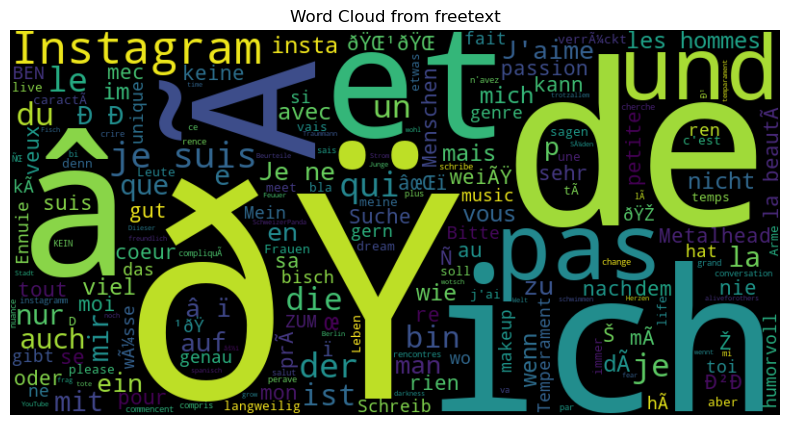

In [9]:
# word cloud - freetext
# Filter out rows where 'freetext' is 'nan' (string representation, not actual NaN)
x = r[r['freetext'] != 'nan']

# Convert 'freetext' column to string type
text = x['freetext'].astype('string')
text.info()

# Concatenate all text in the 'freetext' column to form a single string for word cloud generation
text_data = text.str.cat(sep=' ')

# Create and display a word cloud for 'freetext'
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from freetext")
plt.show()

<class 'pandas.core.series.Series'>
Index: 113 entries, 4e3842f79b70e7ea57000064 to 54d9d5a3e76da1ac328b4577
Series name: whazzup
Non-Null Count  Dtype 
--------------  ----- 
113 non-null    string
dtypes: string(1)
memory usage: 1.8+ KB


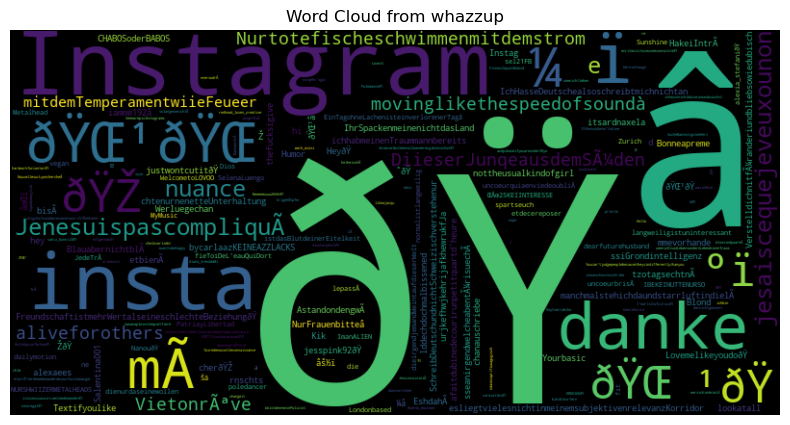

In [10]:
# word cloud - whazzup
# Repeat the same process for 'whazzup' column
text = x['whazzup'].astype('string')
text.info()
text_data = text.str.cat(sep=' ')

# Create and display a word cloud for 'whazzup'
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from whazzup")
plt.show()

# Feature engineering

In [11]:
#  Combine existing binary columns to create new features
r['ISinsta2'] = r['ISinsta'] | r['ISinsta1']
r['ISemoji2'] = r['ISemoji'] | r['ISemoji1']
r['IS_lang_pt_es_en_it'] = r['lang_en'] | r['lang_pt'] | r['lang_es'] | r['lang_it']

# Consolidate categories with low counts into 'Other' to reduce cardinality
name_counts = r['name'].value_counts()
r['nameN'] = r['name'].map(lambda x: 'Other' if name_counts[x] < 10 else x)
city_counts = r['city'].value_counts()
r['cityN'] = r['city'].map(lambda x: 'Other' if city_counts[x] < 10 else x)
locationCity_counts = r['locationCity'].value_counts()
r['locationCityN'] = r['locationCity'].map(lambda x: 'Other' if locationCity_counts[x] < 10 else x)
locationCitySub_counts = r['locationCitySub'].value_counts()
r['locationCitySubN'] = r['locationCitySub'].map(lambda x: 'Other' if locationCitySub_counts[x] < 5 else x)
country_counts = r['country'].value_counts()
r['countryN'] = r['country'].map(lambda x: 'Other' if country_counts[x] < 10 else x)

# Drop columns that are no longer needed or have been transformed
r = r.drop(columns=['lastOnline', 'ISemoji', 'ISemoji1', 'ISinsta', 'ISinsta1', 'pictureId', 
                    'lang_en', 'lang_pt', 'lang_es', 'lang_it', 'name', 'city', 
                    'locationCity', 'locationCitySub', 'country', 'freetext', 'whazzup'])

r.info()  # Display DataFrame info after column drop
r.to_csv('r.csv')  # Save cleaned DataFrame to CSV

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   int64  
 1   counts_pictures         4008 non-null   int64  
 2   counts_profileVisits    4008 non-null   int64  
 3   counts_kisses           4008 non-null   int64  
 4   flirtInterests_chat     4008 non-null   int64  
 5   flirtInterests_friends  4008 non-null   int64  
 6   flirtInterests_date     4008 non-null   int64  
 7   isVIP                   4008 non-null   int64  
 8   isVerified              4008 non-null   int64  
 9   lastOnlineTs            4007 non-null   float64
 10  lang_count              4008 non-null   int64  
 11  lang_fr                 4008 non-null   int64  
 12  lang_de                 4008 non-null   int64  
 13  countDetails        

In [12]:
# Reassign DataFrame to 'df' and display its shape and information
df = r
df.shape

(4008, 38)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   int64  
 1   counts_pictures         4008 non-null   int64  
 2   counts_profileVisits    4008 non-null   int64  
 3   counts_kisses           4008 non-null   int64  
 4   flirtInterests_chat     4008 non-null   int64  
 5   flirtInterests_friends  4008 non-null   int64  
 6   flirtInterests_date     4008 non-null   int64  
 7   isVIP                   4008 non-null   int64  
 8   isVerified              4008 non-null   int64  
 9   lastOnlineTs            4007 non-null   float64
 10  lang_count              4008 non-null   int64  
 11  lang_fr                 4008 non-null   int64  
 12  lang_de                 4008 non-null   int64  
 13  countDetails        

In [14]:
# Display descriptive statistics for the DataFrame
df.describe()

,age,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,isVIP,isVerified,lastOnlineTs,...,counts_g,isInfluencer,shareProfileEnabled,isfreshman,crypt,isSystemProfile,ISpicture,ISinsta2,ISemoji2,IS_lang_pt_es_en_it
count,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.00000,4.007000e+03,...,3983.000000,4008.000000,3983.000000,4008.000000,2943.000000,2940.000000,4008.000000,4008.000000,4008.000000,4008.000000
mean,21.990768,4.796407,3707.971307,156.609531,0.626747,0.627745,0.387475,0.022705,0.21981,1.428923e+09,...,0.125534,-0.006238,0.960834,0.238273,0.020727,0.000680,0.977545,0.052894,0.084581,0.122505
std,1.957539,4.416993,6837.120627,377.041518,0.483729,0.483466,0.487234,0.148979,0.41417,8.250713e+05,...,1.240254,0.078741,0.194015,0.426080,0.142494,0.026078,0.148177,0.223850,0.278292,0.327909
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.426592e+09,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,384.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.428332e+09,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,1222.000000,44.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.428400e+09,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,6.000000,4083.000000,141.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.429992e+09,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,28.000000,30.000000,164425.000000,9288.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.430647e+09,...,43.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Calculate and display maximum values for each column
for col in df.columns.tolist():
    print(col, df[col].max())

age 28
counts_pictures 30
counts_profileVisits 164425
counts_kisses 9288
flirtInterests_chat 1
flirtInterests_friends 1
flirtInterests_date 1
isVIP 1
isVerified 1
lastOnlineTs 1430647264.0
lang_count 9
lang_fr 1
lang_de 1
countDetails 1.0
flirtstar 1
hasBirthday 1
distance 6918.0
mobile 1
online 1
connectedToFacebook 0.0
locked 1.0
genderLooking none
counts_fans 241.0
counts_g 43.0
isInfluencer 0.0
shareProfileEnabled 1.0
isfreshman 1.0
crypt 1.0
isSystemProfile 1.0
ISpicture 1
ISinsta2 1
ISemoji2 1
IS_lang_pt_es_en_it 1
nameN Vanessa
cityN Ä°stanbulboÄŸazÄ±
locationCityN nan
locationCitySubN nan
countryN nan


In [16]:
# Save data type information and summary statistics to CSV files
df.dtypes.to_csv("datatype.csv")
df.max().to_csv("max.csv")
df.min().to_csv("min.csv")
df.isnull().sum(axis=0).to_csv("NA.csv")
df.nunique().to_csv("unique.csv")

In [17]:
# Convert object type columns to categorical for memory optimization
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     4008 non-null   int64   
 1   counts_pictures         4008 non-null   int64   
 2   counts_profileVisits    4008 non-null   int64   
 3   counts_kisses           4008 non-null   int64   
 4   flirtInterests_chat     4008 non-null   int64   
 5   flirtInterests_friends  4008 non-null   int64   
 6   flirtInterests_date     4008 non-null   int64   
 7   isVIP                   4008 non-null   int64   
 8   isVerified              4008 non-null   int64   
 9   lastOnlineTs            4007 non-null   float64 
 10  lang_count              4008 non-null   int64   
 11  lang_fr                 4008 non-null   int64   
 12  lang_de                 4008 non-null   int64   
 13  count

In [18]:
# Save DataFrame to CSV and pickle format for future use
df.to_csv("flatfile.csv")
with open('flatfile.pkl', 'wb') as f:
    pickle.dump(df, f)

In [19]:
# Print value counts for each column
for col in df.select_dtypes(exclude='number'):
    print(df.value_counts(col))

for col in df.select_dtypes(include='number'):
    print(df.value_counts(col))

genderLooking
M       3574
none     363
F         25
nan       25
both      21
Name: count, dtype: int64
nameN
Other       3672
Sarah         33
Laura         26
Lisa          23
Julia         23
Jenny         20
Nadine        19
Marie         17
Nicole        17
Vanessa       16
Jessica       16
Anna          15
Sandra        15
Melanie       12
Sara          12
Jasmin        11
Cindy         11
Manon         10
Michelle      10
Lena          10
Tina          10
...           10
Name: count, dtype: int64
cityN
Other                   2194
nan                      287
ZÃ¼rich                  176
KÃ¶ln                    123
Bern                     122
Frankfurt am Main         85
Lausanne                  81
Stuttgart                 74
Basel                     66
Freiburg im Breisgau      65
GenÃ¨ve                   50
Luzern                    46
Lyon                      40
Torino                    33
Karlsruhe                 29
Wiesbaden                 27
Fribourg           

# Target Value

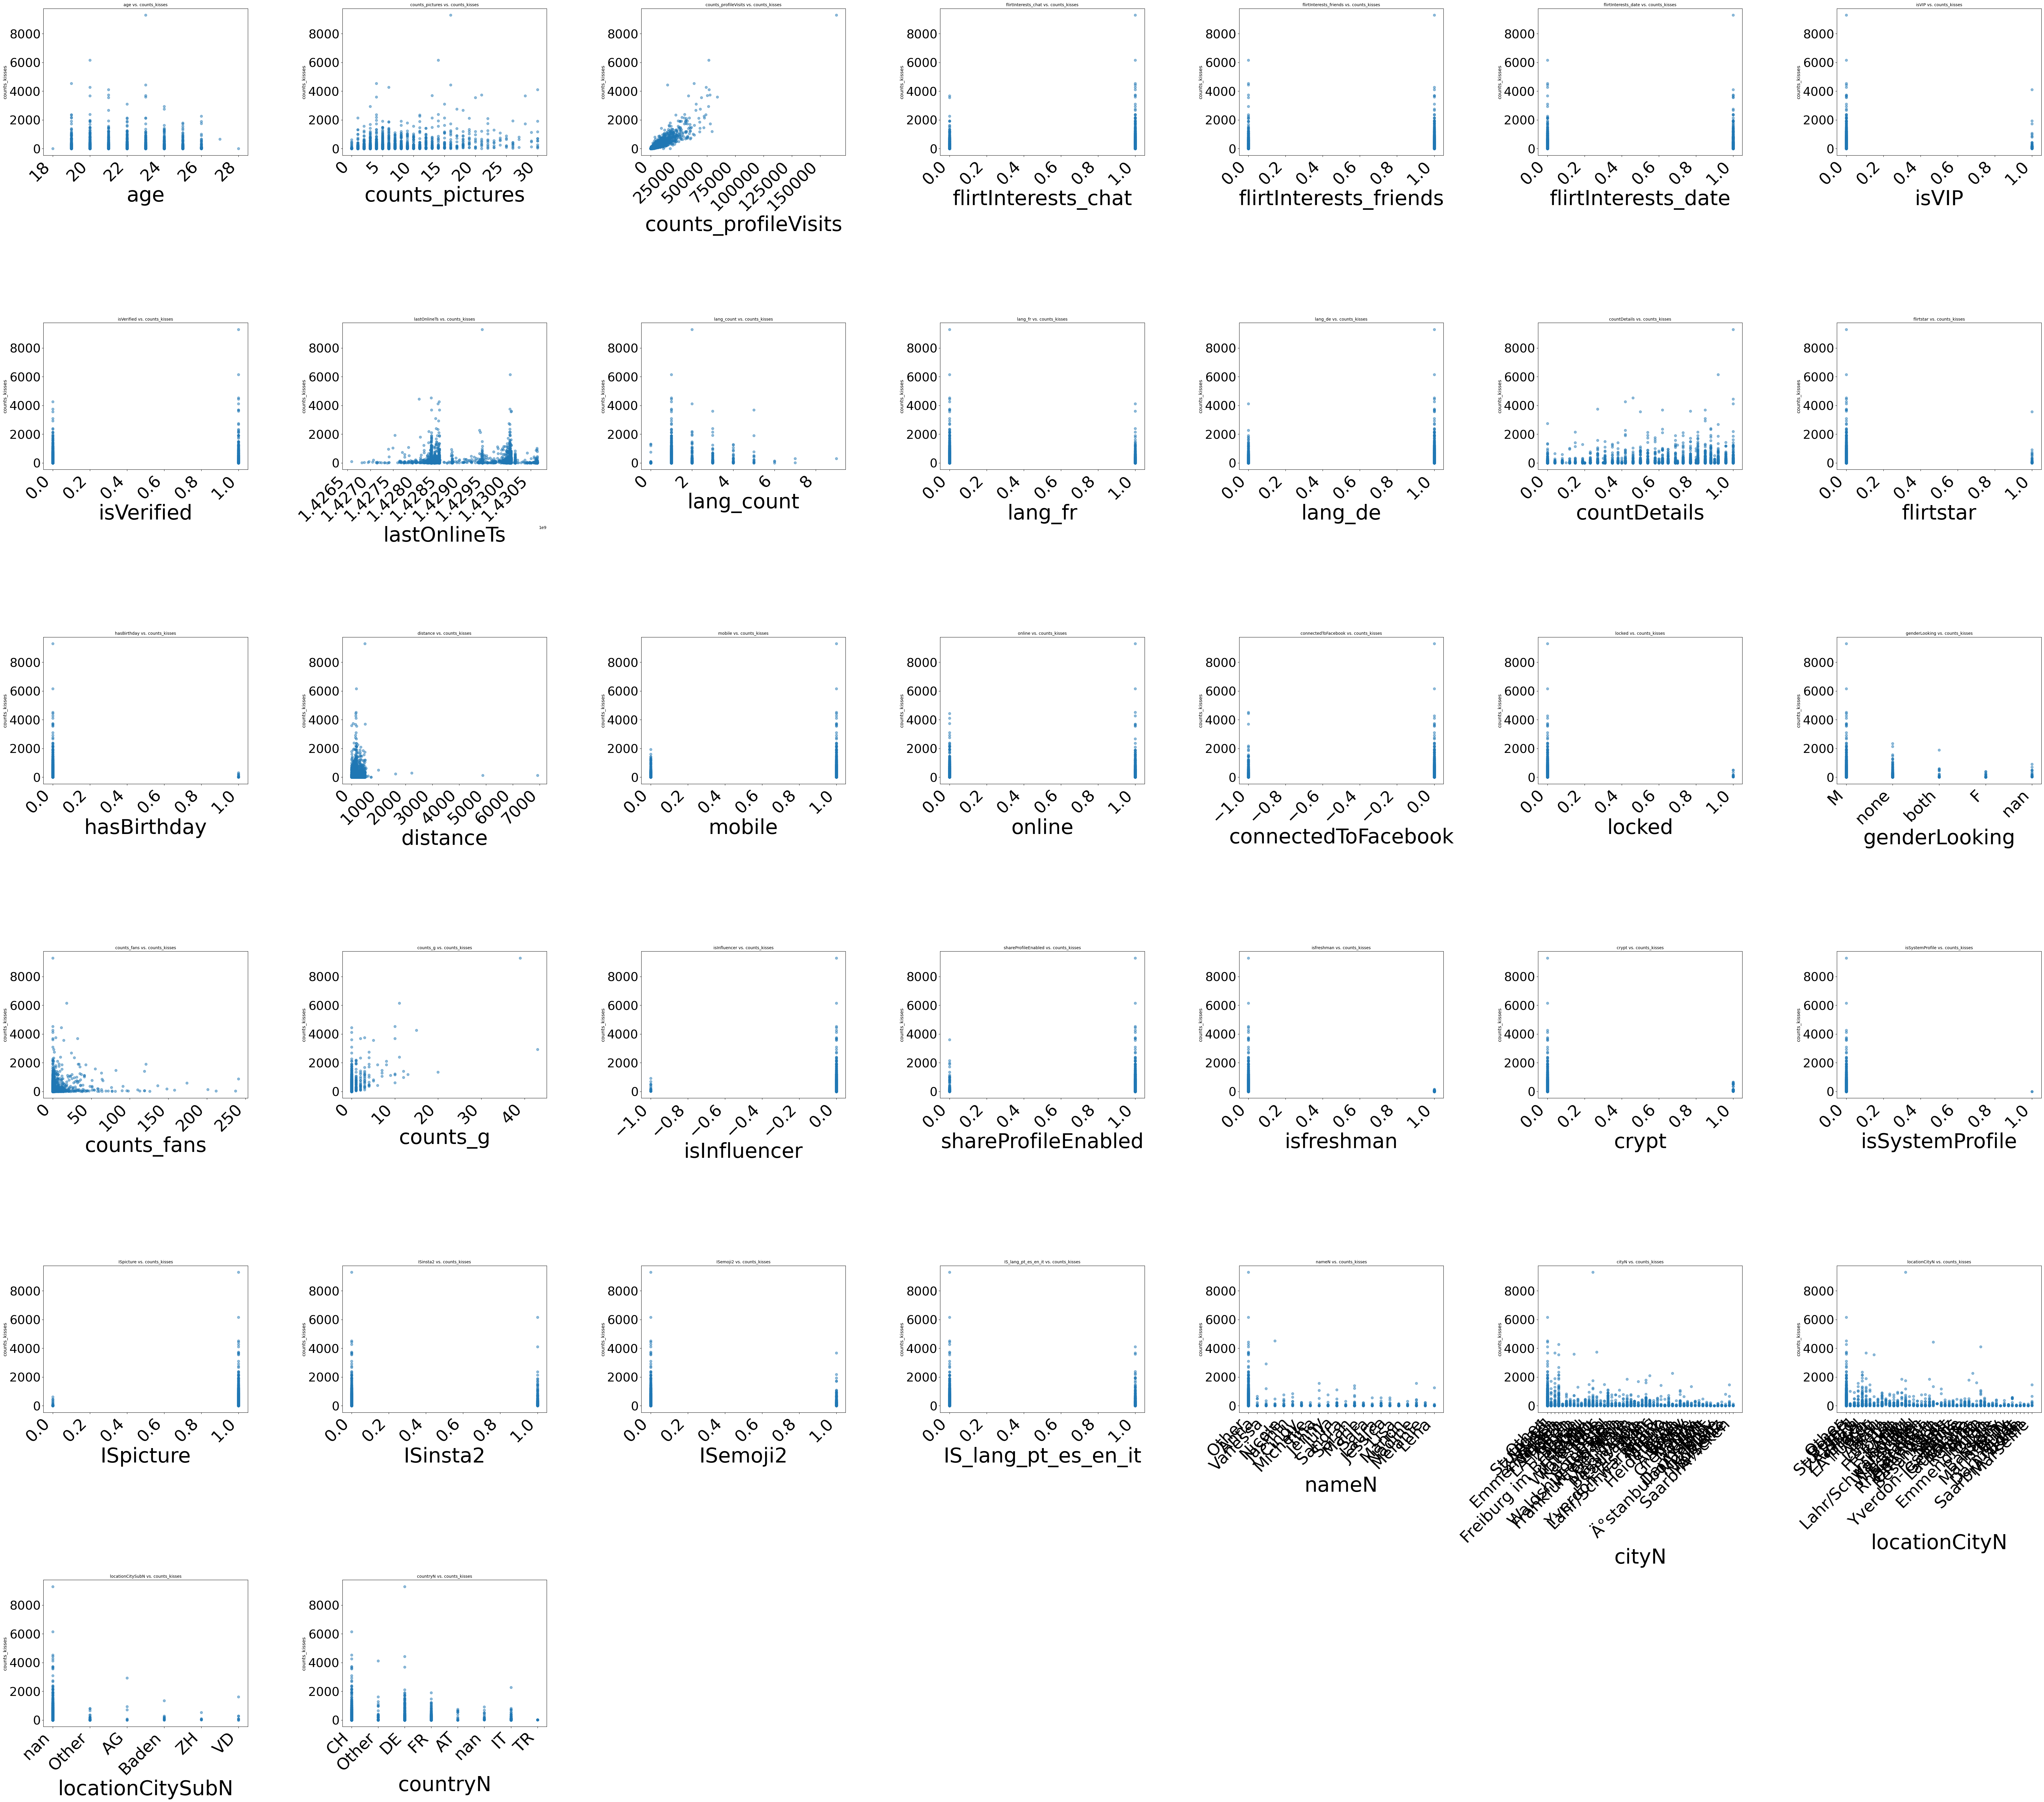

In [20]:
# List of features to plot against the target 'counts_kisses'
features = df.columns.drop('counts_kisses')

# Determine the grid size for plotting scatter plots
num_features = len(features)
grid_size = math.ceil(math.sqrt(num_features))

# Plot scatter plots for each feature against 'counts_kisses'
plt.figure(figsize=(grid_size * 10, grid_size * 10))
for i, feature in enumerate(features):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.scatter(df[feature], df['counts_kisses'], alpha=0.5)
    plt.title(f'{feature} vs. counts_kisses', fontsize=10)
    plt.xlabel(feature, fontsize=50)
    plt.ylabel('counts_kisses', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=40)
    plt.yticks(fontsize=30)

plt.tight_layout(pad=3.0)
plt.show()

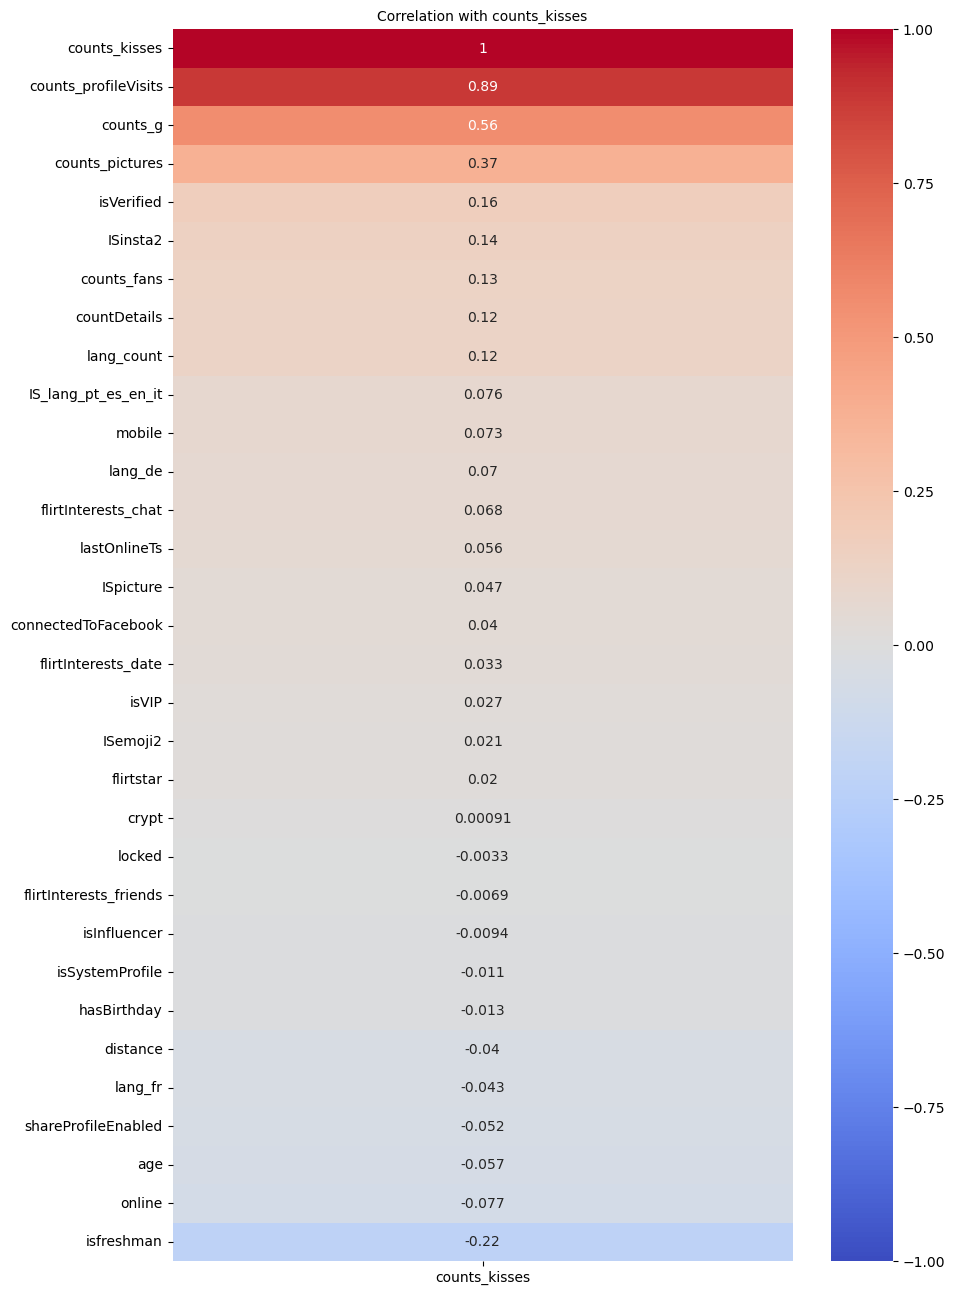

In [21]:
# Select only continuous columns for correlation analysis
con_cols = df.select_dtypes(exclude=['category']).columns.tolist()
df_f = df[con_cols]

# Compute the correlation matrix
corr = df_f.corr()

# Visualize correlation with the target variable 'counts_kisses'
plt.figure(figsize=(10, len(corr.columns) * 0.5))
sb.heatmap(corr[['counts_kisses']].sort_values(by='counts_kisses', ascending=False), 
           annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Correlation with counts_kisses', fontsize=10)
plt.show()

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

# Initialize AutoViz for automated exploratory data analysis
AV = AutoViz_Class()
%matplotlib inline

# Run AutoViz on the DataFrame
AV.AutoViz(df)